noise2 mean
0.0008507071034376886
mixed mean
0.0035379581643498904


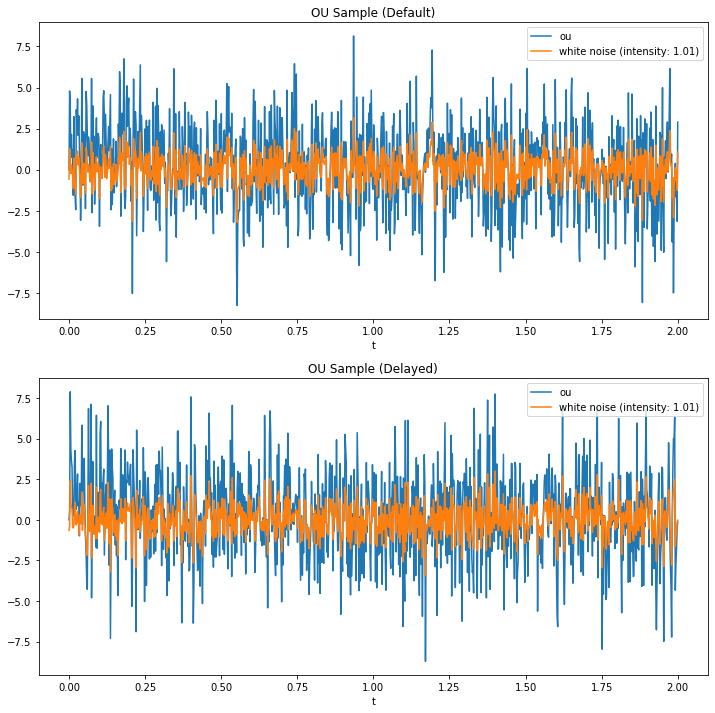

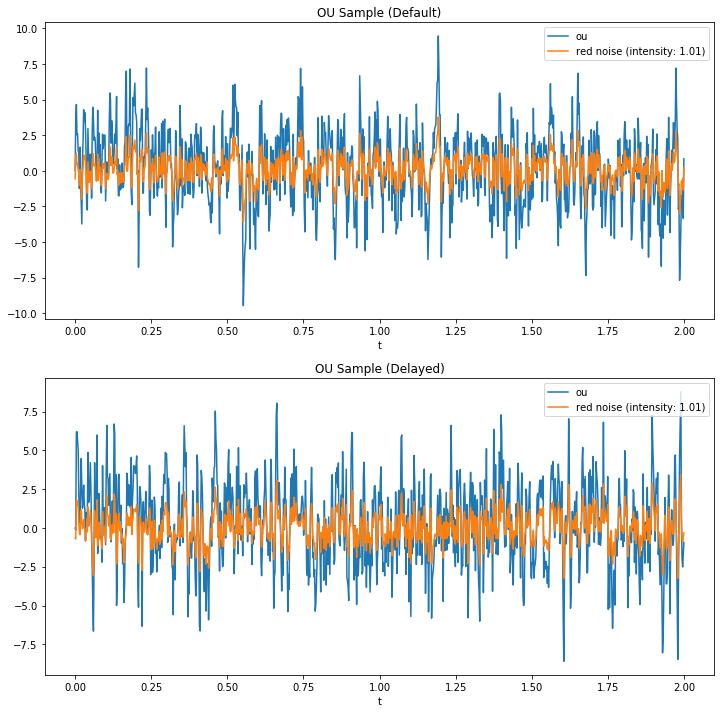

<Figure size 432x288 with 0 Axes>

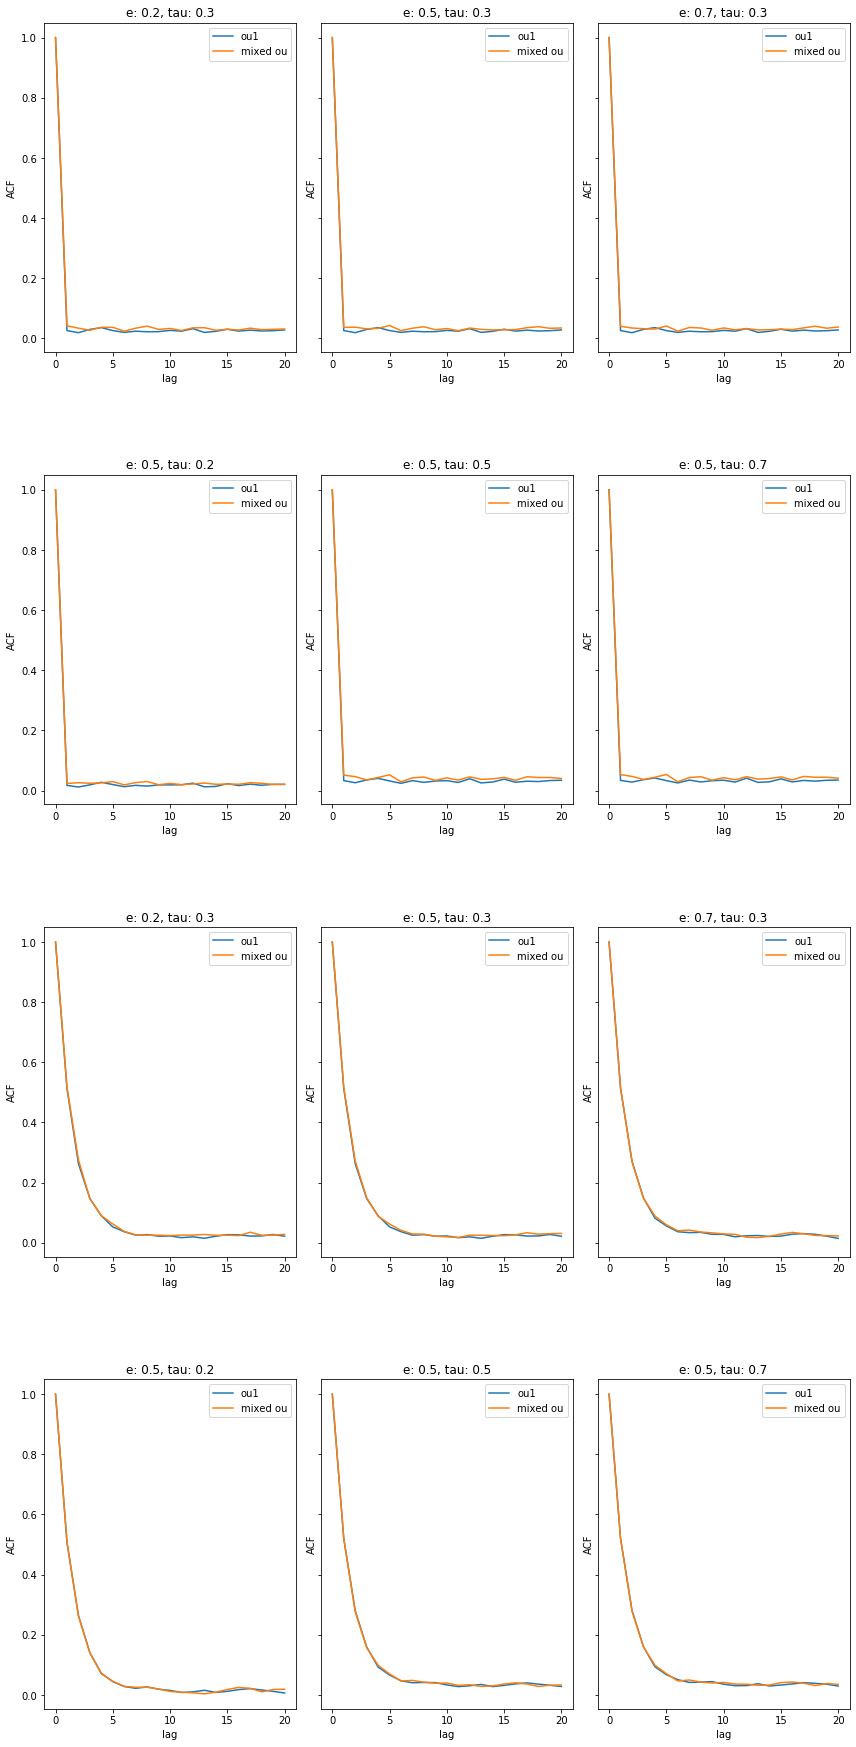

<Figure size 432x288 with 0 Axes>

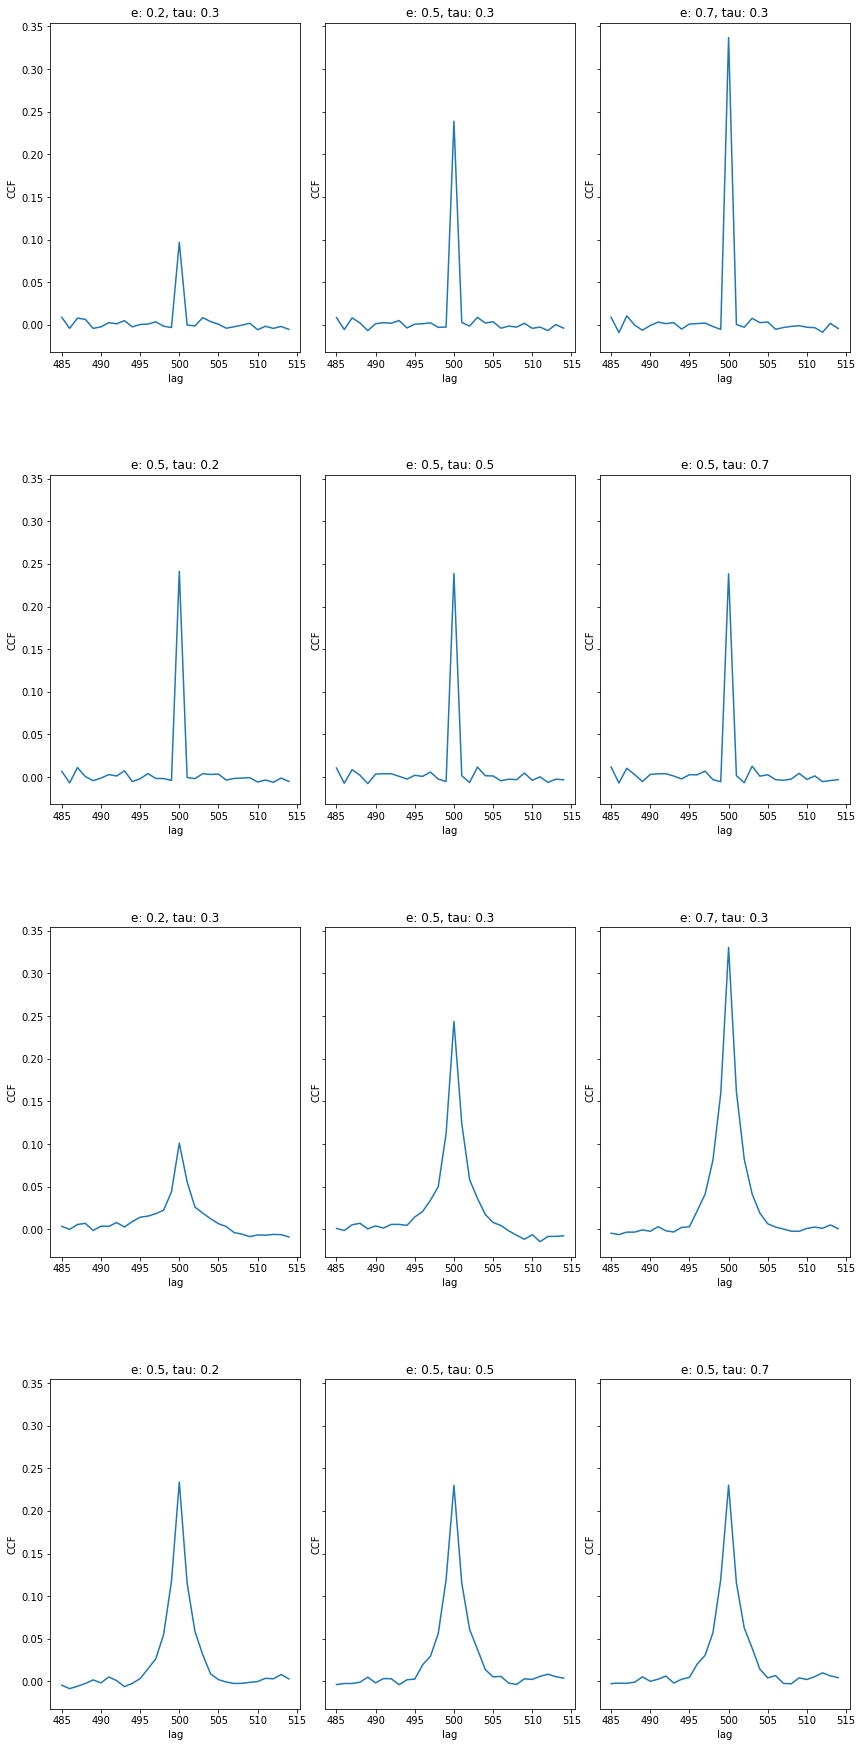

It took 9.964610177004943ms to finish calculations


In [2]:
from main_multiple_runs import calc_and_plot

results = calc_and_plot()



correlation of e and max(ccf)
[0.37344443]
correlation of tau and max(ccf)
[0.0302618]


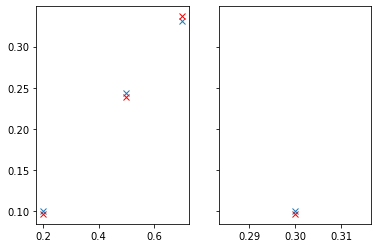

In [40]:
# ccf analysis
import matplotlib.pyplot as plt
import numpy as np

from noise import NoiseType

average_ensemble = lambda e: np.median(e, axis=0)

def get_param_corr_pairs(param, fixedParam):
    param_white = [r['params'][param] for r in results if r['params'][fixedParam] == results[0]['params'][fixedParam] and r['params']['noiseType']['type'] == NoiseType.WHITE]
    param_red = [r['params'][param] for r in results if r['params'][fixedParam] == results[0]['params'][fixedParam] and r['params']['noiseType']['type'] == NoiseType.RED]

    max_correlations_param_red = [np.max(r['ccf']) for r in results if r['params'][fixedParam] == results[0]['params'][fixedParam] and r['params']['noiseType']['type'] == NoiseType.WHITE]
    max_correlations_param_white = [np.max(r['ccf']) for r in results if r['params'][fixedParam] == results[0]['params'][fixedParam] and r['params']['noiseType']['type'] == NoiseType.RED]
    
    return [[param_white, max_correlations_param_white], [param_red, max_correlations_param_red]]

# taus = [r['params']['tau1'] for r in results if r['params']['e'] == r['params']['e'][0]]

[[es_white, max_correlations_e_white], [es_red, max_correlations_e_red]] = get_param_corr_pairs('e', 'tau1')
[[taus_white, max_correlations_tau_white], [taus_red, max_correlations_tau_red]] = get_param_corr_pairs('tau1', 'e')

fig, axs = plt.subplots(1,2, sharey=True)
axs[0].plot(es_white, max_correlations_e_white, 'x')
axs[0].plot(es_red, max_correlations_e_red, 'x', color='r')

axs[1].plot(taus_white, max_correlations_tau_white, 'x')
axs[1].plot(taus_red, max_correlations_tau_red, 'x', color='r')

print('correlation of e and max(ccf)')
print(np.correlate(es_white,max_correlations_e_white))
print('correlation of tau and max(ccf)')
print(np.correlate(taus_white,max_correlations_tau_white))
# print(np.correlate(taus,max_correlation)/np.sqrt(np.std(taus) * np.std(max_correlation)))
# print('correlation of tau and max(ccf)')
# print(np.correlate(np.random.rand(50),np.random.rand(50)))